In [ ]:
# Classify the three species of Iris family based on petal  width, petal length, sepal length and sepal width.


In [3]:
import pandas as pd 
import numpy as np 


import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white' , color_codes=True)

In [4]:
data = pd.read_csv('/iris.csv')

In [5]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)

Dimension of dataset: (150, 5)


In [7]:
# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# getting discriptive statistcs 
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# Extracting dataframe for only 'Object' datatypes
data_ct = data.select_dtypes(include='object')
data_ct.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [11]:
# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Species distribution')

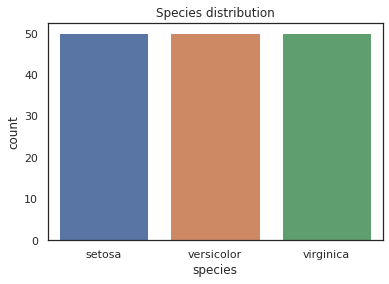

In [13]:
#Count plot for Species
sns.countplot('species',data = data)
plt.title("Species distribution")

In [14]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['species']= label_encoder.fit_transform(data['species']) 

In [15]:
#Check unique value of species
data['species'].unique()

array([0, 1, 2])

In [16]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
#Constructing correlation Matrix
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


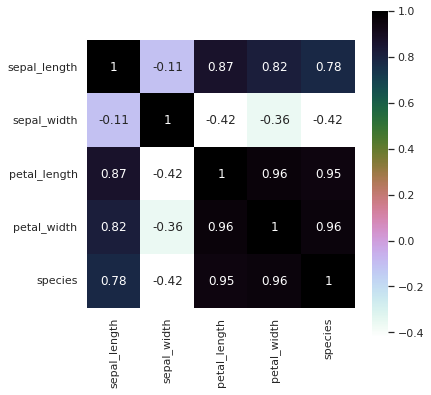

In [18]:
#heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [19]:
# Absolute correlation value with species(Target variable)

abs(corr['species'])[:-1].sort_values(ascending = False)

petal_width     0.956464
petal_length    0.949043
sepal_length    0.782561
sepal_width     0.419446
Name: species, dtype: float64

In [20]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30)

In [21]:
#considering only highly correlated features for training and validation
train_x = train.drop(['species'], axis = 1)
train_y = train['species']             

test_x = test.drop(['species'],axis = 1)
test_y = test['species'] 

In [22]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (105, 4)
Dimension of train_y : (105,)
Dimension of test_x : (45, 4)
Dimension of test_y : (45,)


In [28]:
#Using Decision Tree Classifier for model building by "gini"

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="gini")
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
# Predict Species for test data
pred = clf.predict(test_x)
pred

array([2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0,
       2])

In [30]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 91.11%


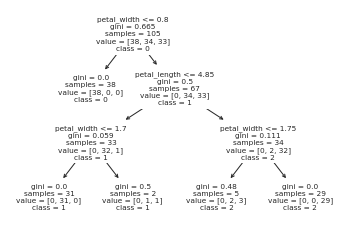

In [31]:
#Model Visualization
from sklearn import tree

tree.plot_tree(clf,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['0', '1', '2'],proportion = False)
plt.show()

In [33]:
#Using Decision Tree Classifier for model building by "entropy"

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf1.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [36]:
# Predict Species for test data
pred1 = clf1.predict(test_x)
pred1

array([2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0,
       2])

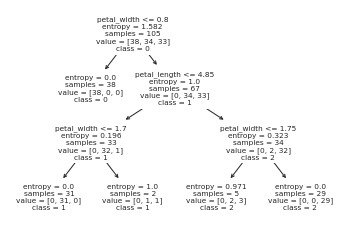

In [37]:
##Model visualization
from sklearn import tree

tree.plot_tree(clf1,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['0', '1', '2'],proportion = False)
plt.show()